In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
data = pd.read_csv('AAP_data.csv')

In [ ]:
data.isnull().sum()
data.drop_duplicates(inplace=True)

In [ ]:
data = data.set_index('date')

In [ ]:
data

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,78.34,79.7200,78.0100,78.90,1298137,AAP
2013-02-11,78.65,78.9100,77.2300,78.39,758016,AAP
2013-02-12,78.39,78.6300,77.5132,78.60,876859,AAP
2013-02-13,78.90,79.1300,77.8500,78.97,1038574,AAP
2013-02-14,78.66,79.7200,78.5850,78.84,1005376,AAP
...,...,...,...,...,...,...
2018-02-01,116.24,118.8300,115.8300,117.29,760629,AAP
2018-02-02,115.92,117.1800,113.1250,113.93,1092333,AAP
2018-02-05,113.05,114.9700,109.8100,109.86,1281592,AAP


In [ ]:
data.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,132.439631,133.818297,131.036025,132.433463,1.078043e+06
std,31.269628,31.545809,30.968405,31.274463,1.019365e+06
min,76.040000,76.660000,75.623000,76.180000,1.307120e+05
25%,104.070000,105.724950,102.260000,104.440000,6.182010e+05
50%,141.150000,143.000000,139.405000,141.300000,8.491350e+05
75%,156.980000,158.270000,155.320000,156.730000,1.219762e+06
max,201.240000,201.240000,198.160000,200.380000,1.974952e+07


Text(0, 0.5, 'Price')

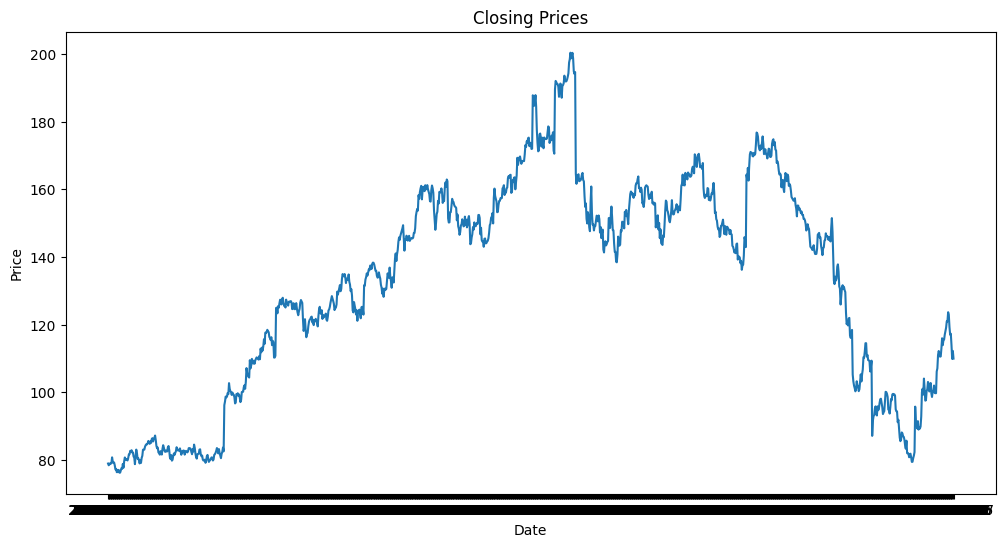

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['close'])
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

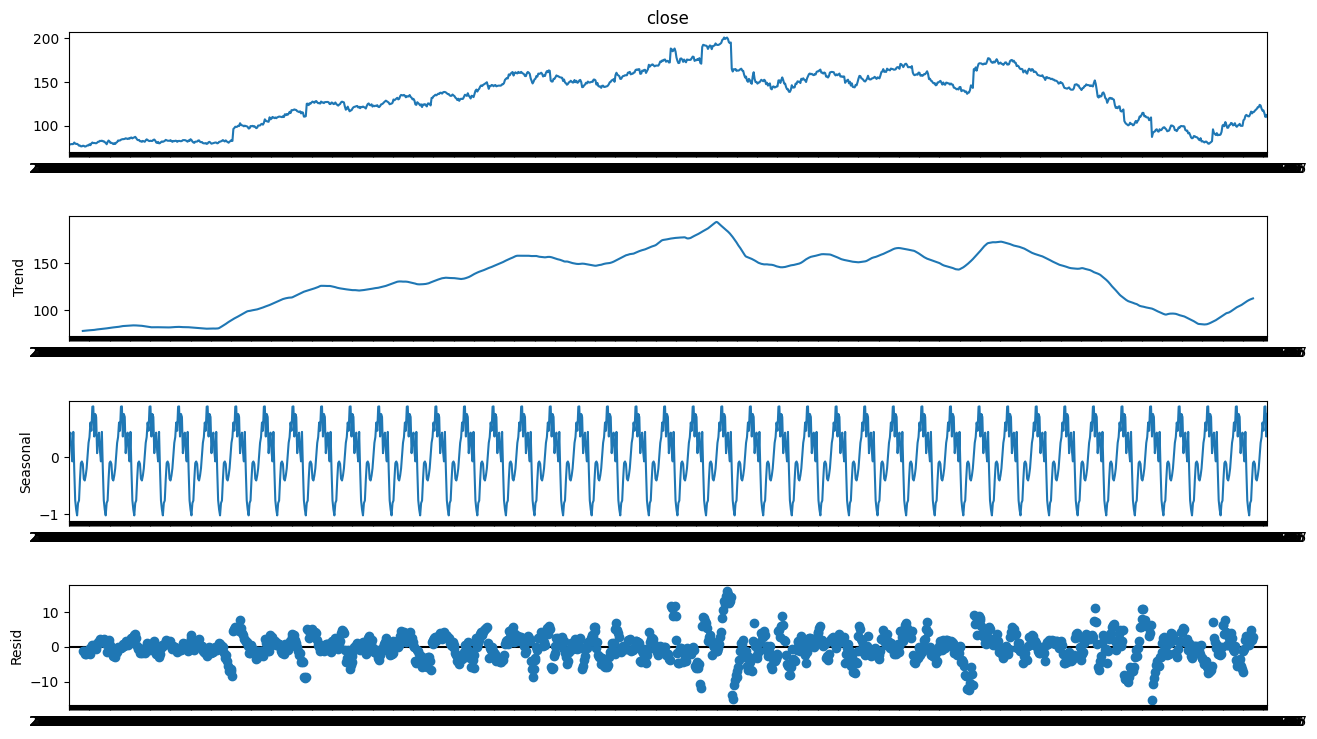

In [ ]:
decomposition = seasonal_decompose(data['close'], model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

In [ ]:
# Разделить данные на тестовые и обучающие
train_data = data.iloc[:-100, :]
test_data = data.iloc[-100:, :]

In [ ]:
model_arima = ARIMA(train_data['close'], order=(1,1,1))
fitted_arima = model_arima.fit()
print(fitted_arima.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1159
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2696.889
Date:                Thu, 27 Apr 2023   AIC                           5399.778
Time:                        16:33:01   BIC                           5414.942
Sample:                             0   HQIC                          5405.500
                               - 1159                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4665      0.873     -0.535      0.593      -2.177       1.244
ma.L1          0.4901      0.860      0.570      0.569      -1.195       2.175
sigma2         6.1716      0.066     93.512      0.0

In [ ]:
# Использовать модель Хольта-Винтерса
model_hw = ExponentialSmoothing(train_data['close'], seasonal_periods=12,trend='add', seasonal='add')
fitted_hw = model_hw.fit()
print(fitted_hw.summary())


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    close   No. Observations:                 1159
Model:             ExponentialSmoothing   SSE                           7101.677
Optimized:                         True   AIC                           2133.004
Trend:                         Additive   BIC                           2213.889
Seasonal:                      Additive   AICC                          2133.604
Seasonal Periods:                    12   Date:                 Thu, 27 Apr 2023
Box-Cox:                          False   Time:                         16:33:05
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


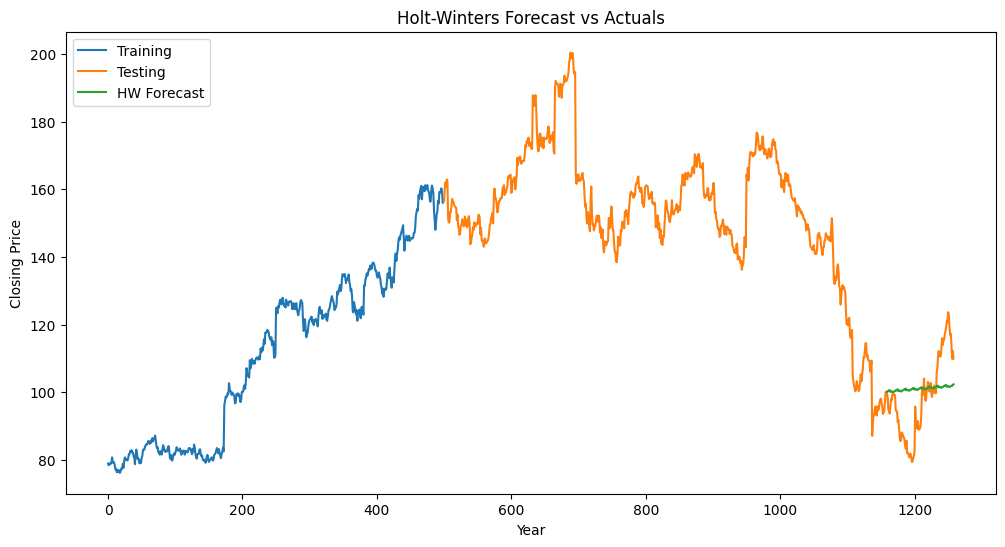

In [82]:
# предсказания для Holt-Winters и визуализировать на графике
fc_hw = fitted_hw.forecast(len(test_data['close']))
fc_series_hw = pd.Series(fc_hw, index=test_data.index)

plt.figure(figsize=(12,6))
plt.plot(train_data['close'], label='Training')
plt.plot(test_data['close'], label='Testing')
plt.plot(fc_series_hw, label='HW Forecast')
plt.title('Holt-Winters Forecast vs Actuals')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend(loc='upper left')
plt.show()

In [83]:
# Избавиться от выбросов:
from scipy import stats
z_scores = stats.zscore(train_data['close'])
indices = np.where(z_scores > 3)[0]
train_data.drop(train_data.index[indices], inplace=True)

<ipython-input-83-e42f075d0d5f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(train_data.index[indices], inplace=True)
